Impor Libary

In [282]:
!pip install scipy

In [283]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore")

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV




from sklearn.ensemble import RandomForestClassifier


Load Dataset

In [284]:
df = pd.read_csv("/content/Obesity prediction.csv")

EDA

In [285]:
df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

In [287]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [288]:
# Pilih kolom numerik yang ingin diatasi outlier-nya
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [289]:
# Terapkan Winsorizing pada setiap kolom numerik
for col in numeric_cols:
    df[col] = winsorize(df[col], limits=[0.05, 0.05])  # Batasi 5% data ekstrem di kedua ujung

In [290]:
# Korelasi antar fitur
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()

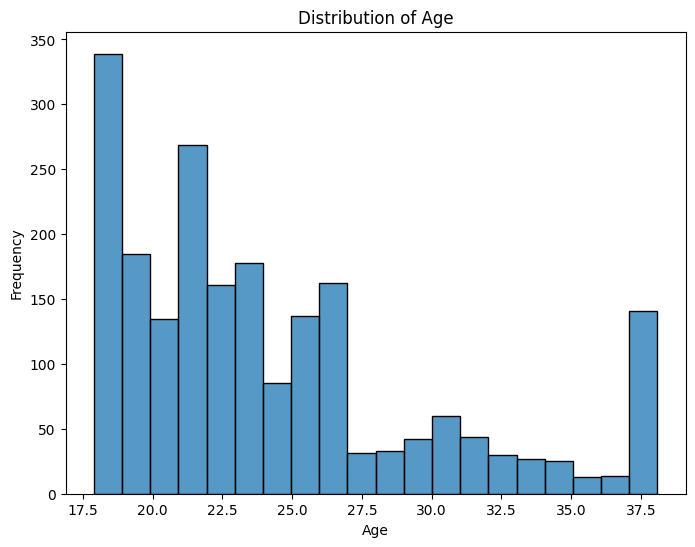

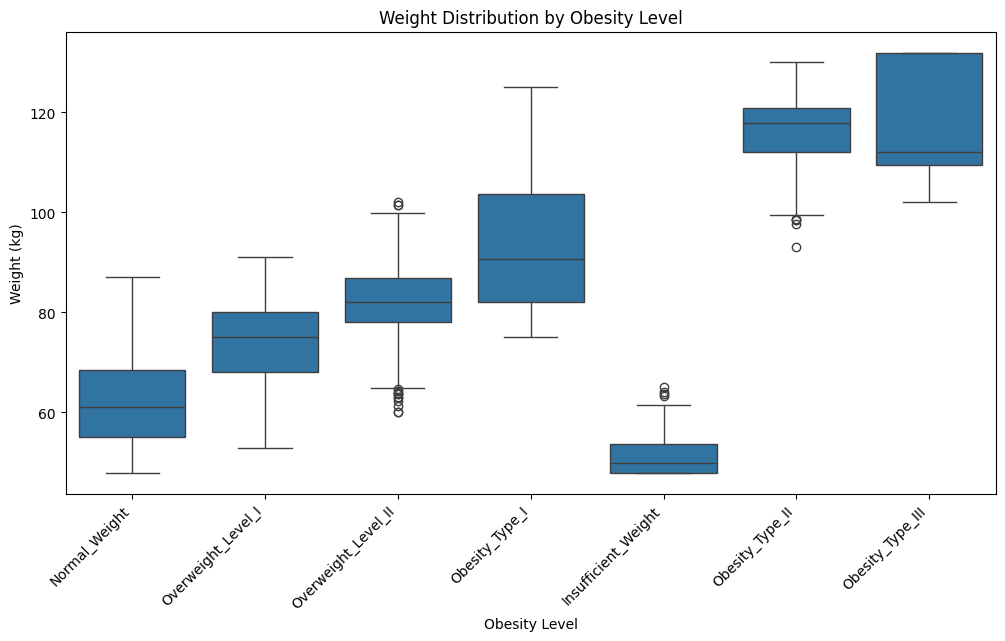

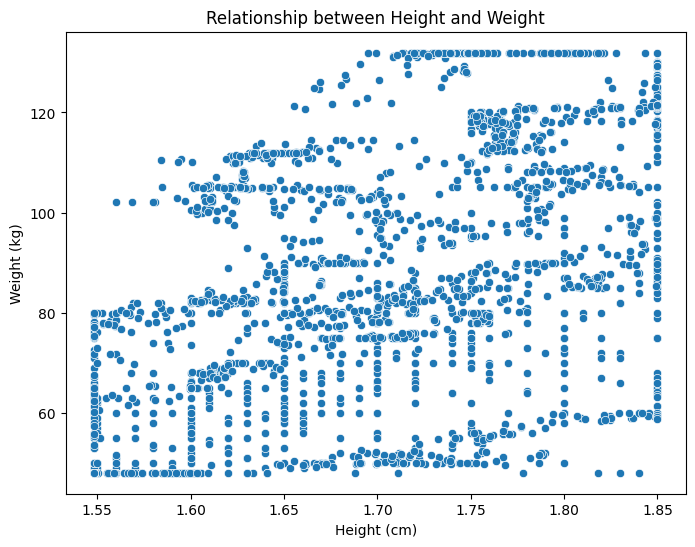

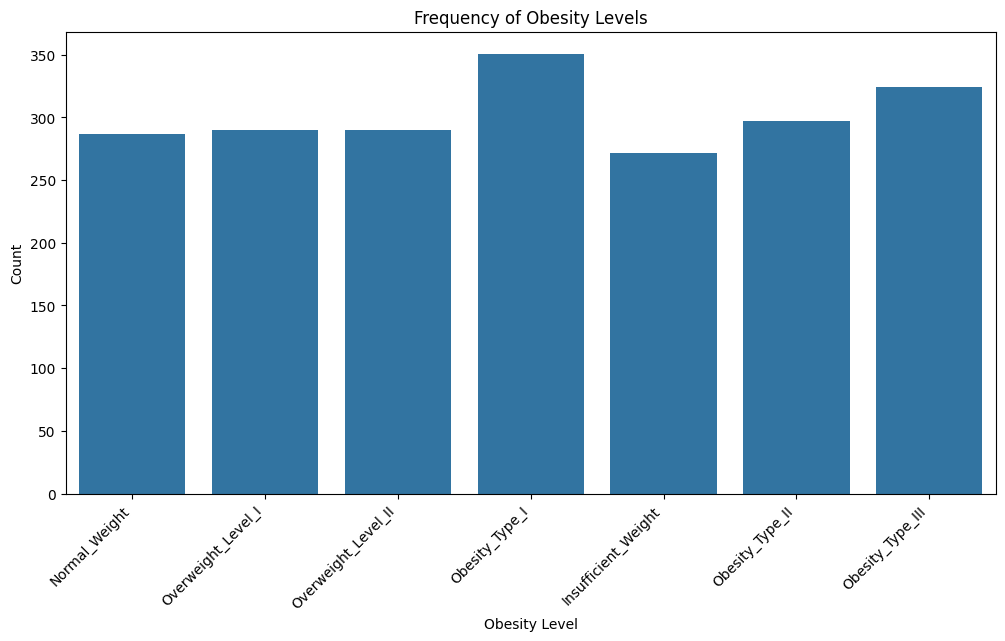

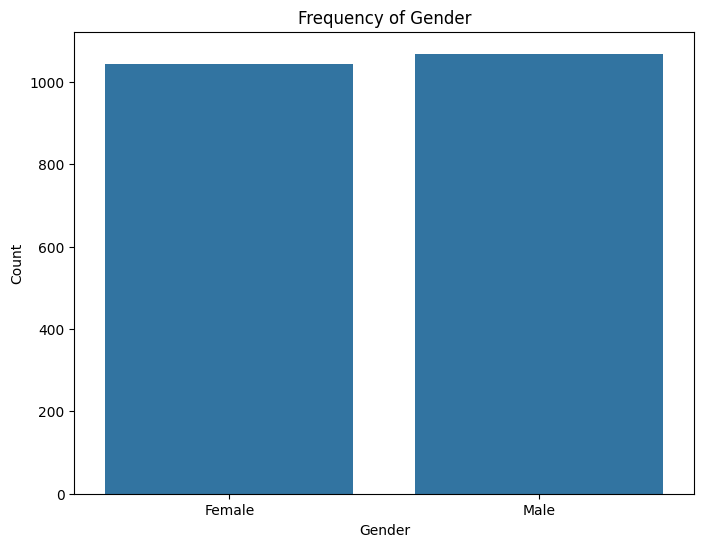

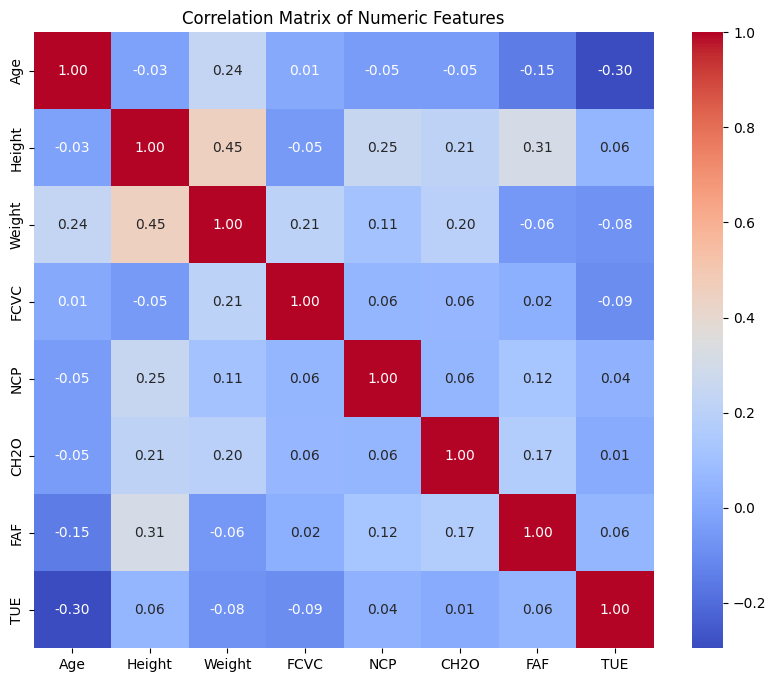

In [291]:
# 1. Histogram untuk Age
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 2. Box Plot untuk Weight berdasarkan Obesity Level
plt.figure(figsize=(12, 6))
sns.boxplot(x='Obesity', y='Weight', data=df)
plt.title('Weight Distribution by Obesity Level')
plt.xlabel('Obesity Level')
plt.ylabel('Weight (kg)')
plt.xticks(rotation=45, ha='right')
plt.show()

# 3. Scatter Plot untuk Height dan Weight
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Height', y='Weight', data=df)
plt.title('Relationship between Height and Weight')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

# 4. Bar Chart untuk Frequency of Obesity Levels
plt.figure(figsize=(12, 6))
sns.countplot(x='Obesity', data=df)
plt.title('Frequency of Obesity Levels')
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# 5. Countplot untuk Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df)
plt.title('Frequency of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# 6. Heatmap untuk fitur numerik
numeric_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
correlation_matrix = df[numeric_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

PRE-PROCESSING

In [292]:
# Identifikasi fitur kategorikal
categorical_columns = df.select_dtypes(include=['object']).columns

In [293]:
# Encode fitur kategorikal menjadi numerik
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [294]:
# melihat adanya missing value
df.isna().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


In [295]:
# Cek data duplikat
df.duplicated().sum()

24

In [296]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Verify if duplicates are removed
print(f"Number of duplicates: {df.duplicated().sum()}")

Number of duplicates: 0


In [297]:
# Display the rows before removing duplicates
print("Rows before removing duplicates:")
duplicate_rows = df[df.duplicated(keep=False)]
print(duplicate_rows)

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Verify if duplicates are removed
print(f"\nNumber of duplicates after removal: {df.duplicated().sum()}")

# Display the DataFrame after removing duplicates (optional)
print("\nDataFrame after removing duplicates:")
df

Rows before removing duplicates:
Empty DataFrame
Columns: [Gender, Age, Height, Weight, family_history, FAVC, FCVC, NCP, CAEC, SMOKE, CH2O, SCC, FAF, TUE, CALC, MTRANS, Obesity]
Index: []

Number of duplicates after removal: 0

DataFrame after removing duplicates:


,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,3,3,1
1,0,21.000000,1.548178,56.000000,1,0,3.0,3.0,2,1,3.000000,1,2.685087,0.000000,2,3,1
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,1,3,1
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,1,4,5
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,3,4
2107,0,21.982942,1.748584,131.929712,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,3,4
2108,0,22.524036,1.752206,131.929712,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,3,4
2109,0,24.361936,1.739450,131.929712,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,3,4


Split Data

In [298]:
x = df.drop(['Obesity'], axis=1)
y = df['Obesity']

In [299]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [300]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(x, y)

In [301]:
# Total data sebelum split
total_data = len(X_smote)

# Jumlah data training
num_train = len(X_train)

# Jumlah data testing
num_test = len(X_test)

# Persentase data training
train_percentage = (num_train / total_data) * 100

# Persentase data testing
test_percentage = (num_test / total_data) * 100

# Menampilkan informasi
print(f"Total data sebelum split: {total_data}")
print(f"Jumlah data training: {num_train}")
print(f"Jumlah data testing: {num_test}")
print(f"Persentase data training: {train_percentage:.2f}%")
print(f"Persentase data testing: {test_percentage:.2f}%")

Total data sebelum split: 2457
Jumlah data training: 1669
Jumlah data testing: 418
Persentase data training: 67.93%
Persentase data testing: 17.01%


Balance Data

Before SMOTE: Counter({2: 351, 4: 324, 3: 297, 6: 290, 1: 282, 5: 276, 0: 267})


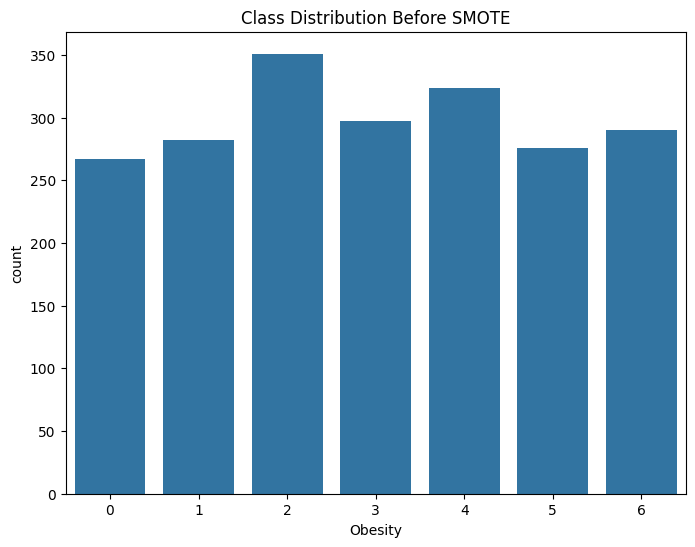

In [302]:
# Before SMOTE
print("Before SMOTE:",Counter(y))
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title('Class Distribution Before SMOTE')
plt.show()

After SMOTE: Counter({1: 351, 5: 351, 6: 351, 2: 351, 0: 351, 3: 351, 4: 351})


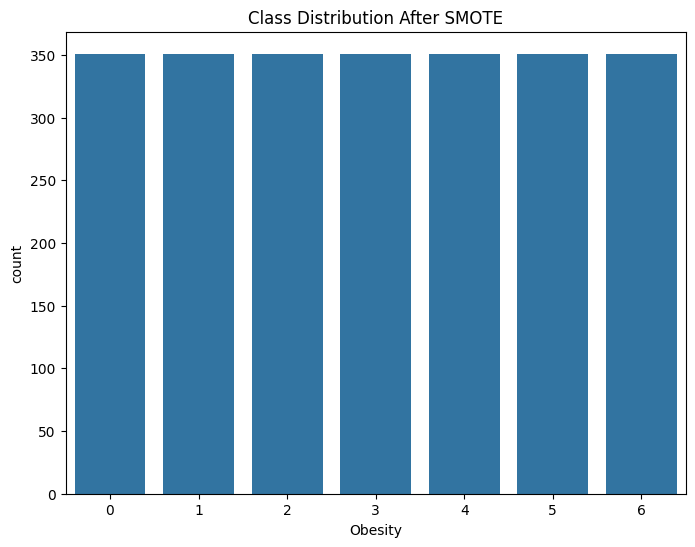

In [303]:
# After SMOTE
print("After SMOTE:",Counter(y_smote))
plt.figure(figsize=(8, 6))
sns.countplot(x=y_smote)
plt.title('Class Distribution After SMOTE')
plt.show()

Normalisasi Data

In [304]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [305]:
X_train = pd.DataFrame(X_train, columns=x.columns)
X_test = pd.DataFrame(X_test, columns=x.columns)

In [306]:
# Display the normalized training data
print("Normalized Training Data:")
print(X_train)

# Display the normalized testing data
print("\nNormalized Testing Data:")
X_test

Normalized Training Data:
        Gender       Age    Height    Weight  family_history      FAVC  \
0     0.981595 -0.562698  1.222243 -0.280300       -2.171579 -2.749359   
1     0.981595 -1.088685  0.955478 -1.427150       -2.171579  0.363721   
2     0.981595 -0.317850  1.681352 -1.028964        0.460495  0.363721   
3     0.981595 -0.387369  0.189248 -0.199750       -2.171579  0.363721   
4     0.981595 -1.108309  0.992689 -1.206622        0.460495  0.363721   
...        ...       ...       ...       ...             ...       ...   
1664  0.981595 -0.197379  1.664743  1.387932        0.460495  0.363721   
1665 -1.018750  1.971916 -0.593394 -0.302937        0.460495  0.363721   
1666  0.981595 -0.232631  1.032298  0.118795        0.460495  0.363721   
1667  0.981595 -0.170434  0.659927  0.437775        0.460495  0.363721   
1668 -1.018750 -1.108309 -1.188078 -0.884423        0.460495  0.363721   

          FCVC       NCP      CAEC     SMOKE      CH2O       SCC       FAF  \
0    -1

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,-1.018750,-0.982875,-0.250130,0.149509,0.460495,0.363721,-1.867025,0.426567,0.325912,-0.139814,-1.034962,-0.224379,-1.067182,0.561045,-0.510241,0.505940
1,0.981595,1.225529,1.668095,1.535207,0.460495,0.363721,0.093741,0.426567,0.325912,7.152360,-0.573621,-0.224379,-0.017293,-0.730918,-0.510241,0.505940
2,-1.018750,-1.108309,-1.073300,-0.884423,0.460495,0.363721,-1.871922,-2.241727,0.325912,-0.139814,-0.013481,-0.224379,-1.226034,-1.090305,1.429604,0.505940
3,0.981595,-1.108309,1.331935,-1.153253,0.460495,0.363721,0.221686,1.433312,0.325912,-0.139814,-0.013481,-0.224379,1.210033,-0.542911,1.429604,-1.868232
4,0.981595,0.442722,1.293370,1.315503,0.460495,0.363721,-0.408986,0.426567,0.325912,-0.139814,1.177491,-0.224379,-0.295950,-1.090305,-0.510241,0.505940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.981595,1.121419,0.588627,1.282606,0.460495,0.363721,0.923743,0.426567,0.325912,-0.139814,0.458151,-0.224379,-0.437197,1.664672,-0.510241,-1.868232
414,0.981595,1.251405,1.377709,1.590910,0.460495,0.363721,0.986816,0.426567,0.325912,7.152360,-0.877201,-0.224379,-0.072845,1.156296,-0.510241,0.505940
415,0.981595,0.225030,0.764558,1.095649,0.460495,0.363721,-0.586555,0.426567,0.325912,-0.139814,0.179485,-0.224379,0.395809,-1.002879,-0.510241,0.505940
416,0.981595,2.214473,0.451514,0.783805,0.460495,0.363721,0.185740,0.296673,0.325912,-0.139814,-1.671274,-0.224379,0.806816,-1.090305,1.429604,-1.868232


In [307]:
# Display descriptive statistics of the normalized training data
print("\nDescriptive Statistics of Normalized Training Data:")
print(X_train.describe())


Descriptive Statistics of Normalized Training Data:
             Gender           Age        Height        Weight  family_history  \
count  1.669000e+03  1.669000e+03  1.669000e+03  1.669000e+03    1.669000e+03   
mean   5.747350e-17  6.577523e-16 -1.882789e-15 -4.257296e-18    1.277189e-17   
std    1.000300e+00  1.000300e+00  1.000300e+00  1.000300e+00    1.000300e+00   
min   -1.018750e+00 -1.108309e+00 -1.782876e+00 -1.569097e+00   -2.171579e+00   
25%   -1.018750e+00 -7.474522e-01 -8.194363e-01 -8.240108e-01    4.604945e-01   
50%    9.815953e-01 -2.389780e-01  2.023909e-03 -1.479662e-01    4.604945e-01   
75%    9.815953e-01  3.139474e-01  7.631343e-01  8.491823e-01    4.604945e-01   
max    9.815953e-01  2.435209e+00  1.681352e+00  1.811164e+00    4.604945e-01   

               FAVC          FCVC           NCP          CAEC         SMOKE  \
count  1.669000e+03  1.669000e+03  1.669000e+03  1.669000e+03  1.669000e+03   
mean   1.277189e-17 -1.404908e-16  4.129577e-16 -3.405837e-

Pelatihan dan Evaluasi Model Random Forest

In [308]:
# Inisialisasi Random Forest
rf = RandomForestClassifier(random_state=42)

In [309]:
# Latih model
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [310]:
# Prediction
y_pred = rf.predict(X_test)

In [311]:
# Evaluation Metrics
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92        59
           1       0.84      0.87      0.85        61
           2       1.00      0.97      0.99        70
           3       1.00      1.00      1.00        64
           4       1.00      1.00      1.00        60
           5       0.92      0.89      0.91        55
           6       0.94      1.00      0.97        49

    accuracy                           0.95       418
   macro avg       0.95      0.95      0.95       418
weighted avg       0.95      0.95      0.95       418

Accuracy: 0.9497607655502392
Confusion Matrix:
 [[54  5  0  0  0  0  0]
 [ 4 53  0  0  0  4  0]
 [ 0  0 68  0  0  0  2]
 [ 0  0  0 64  0  0  0]
 [ 0  0  0  0 60  0  0]
 [ 0  5  0  0  0 49  1]
 [ 0  0  0  0  0  0 49]]


In [312]:
# Display people with obesity based on categories
obesity_categories = df['Obesity'].unique()
for category in obesity_categories:
  print(f"\nPeople with Obesity Level: {category}")
  print(df[df['Obesity'] == category])


People with Obesity Level: 1
     Gender   Age    Height  Weight  family_history  FAVC  FCVC  NCP  CAEC  \
0         0  21.0  1.620000    64.0               1     0   2.0  3.0     2   
1         0  21.0  1.548178    56.0               1     0   3.0  3.0     2   
2         1  23.0  1.800000    77.0               1     0   2.0  3.0     2   
5         1  29.0  1.620000    53.0               0     1   2.0  3.0     2   
6         0  23.0  1.548178    55.0               1     1   3.0  3.0     2   
..      ...   ...       ...     ...             ...   ...   ...  ...   ...   
491       1  25.0  1.660000    68.0               0     1   2.0  3.0     2   
493       1  20.0  1.800000    65.0               0     1   2.0  3.0     1   
494       0  18.0  1.670000    66.0               0     1   3.0  3.0     2   
495       1  19.0  1.800000    60.0               1     1   3.0  1.0     0   
497       1  20.0  1.560000    48.0               0     0   2.0  3.0     2   

     SMOKE  CH2O  SCC       FAF  

In [313]:
obesity_counts = df['Obesity'].value_counts()

print("Orang yang terkena Obesity berdasarkan kelas:")
for obesity_class, count in obesity_counts.items():
    print(f"- {obesity_class}: {count} orang")

Orang yang terkena Obesity berdasarkan kelas:
- 2: 351 orang
- 4: 324 orang
- 3: 297 orang
- 6: 290 orang
- 1: 282 orang
- 5: 276 orang
- 0: 267 orang


In [314]:
# Seleksi Fitur
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
selected_features = feature_importances.nlargest(5).index

# Buat Subset Data Training dan Testing
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Latih model Random Forest dengan fitur terpilih
rf_selected = RandomForestClassifier(random_state=42)
rf_selected.fit(X_train_selected, y_train)

RandomForestClassifier(random_state=42)

In [315]:
# Prediction with selected features
y_pred_selected = rf_selected.predict(X_test_selected)

# Evaluation Metrics with selected features
print(classification_report(y_test, y_pred_selected))
print("Accuracy (Selected Features):", accuracy_score(y_test, y_pred_selected))
print("Confusion Matrix (Selected Features):\n", confusion_matrix(y_test, y_pred_selected))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        59
           1       0.95      0.85      0.90        61
           2       0.99      0.97      0.98        70
           3       1.00      1.00      1.00        64
           4       1.00      1.00      1.00        60
           5       0.91      0.93      0.92        55
           6       0.91      0.98      0.94        49

    accuracy                           0.96       418
   macro avg       0.95      0.96      0.96       418
weighted avg       0.96      0.96      0.96       418

Accuracy (Selected Features): 0.9569377990430622
Confusion Matrix (Selected Features):
 [[57  2  0  0  0  0  0]
 [ 4 52  0  0  0  5  0]
 [ 0  0 68  0  0  0  2]
 [ 0  0  0 64  0  0  0]
 [ 0  0  0  0 60  0  0]
 [ 0  1  0  0  0 51  3]
 [ 0  0  1  0  0  0 48]]


In [316]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9497607655502392
